#**ECS7020P mini-project submission(ADVANCED)**



Student Name: Hafsa Mohammed





Student ID: 200428779


# 2. Problem Formulation
The machine learning problem addressed in this project is the classification of cuisine types based on food images. The interesting aspect lies in creating a model that can distinguish between various cuisines, providing a foundation for applications in recipe recommendation, culinary exploration, and cultural understanding through visual content.

# 3. Machine Learning Pipeline
The machine learning pipeline involves the following stages:

- **Data Collection:** A dataset containing images of food items from different cuisines, along with corresponding labels.
- **Data Preprocessing:** The images are preprocessed by resizing, converting to grayscale, and normalizing pixel values.
- **Feature Extraction:** Extracting features from the preprocessed images, in this case, mean and standard deviation of pixel intensities.
- **Model Training:** Training a Convolutional Neural Network (CNN) with multiple layers for cuisine classification.
- **Model Evaluation:** Evaluating the model on a test set to assess its performance.

# 4. Transformation Stage
**Feature Extraction:** The images are transformed by resizing to a standard size (200x200), converted to grayscale, and normalized. Feature extraction involves computing the mean and standard deviation of pixel intensities, providing simple yet informative features for cuisine classification.

# 5. Modelling
**Convolutional Neural Network (CNN):** A CNN is chosen for its ability to automatically learn hierarchical features from images. The model comprises convolutional layers for feature extraction, max-pooling layers for spatial reduction, and fully connected layers for classification. A softmax activation function is used in the output layer for multi-class classification.

# 6. Methodology
The model is trained for 25 epochs using the Adam optimizer and sparse categorical crossentropy loss function. The training and validation performance metrics, including accuracy, are monitored. Model performance is assessed using the validation accuracy and loss. The dataset is split into training and test sets to evaluate generalization.

# 7. Dataset
The dataset consists of images of food items from different cuisines. The original dataset is filtered to include only classes with more than 100 images, resulting in 5 target classes. Augmentation is applied to selected classes, balancing the dataset. The images are then preprocessed by resizing, converting to grayscale, and normalizing pixel values.

# 8. Results
After training the CNN model for 25 epochs, the validation accuracy reaches approximately 86.32%. The training loss decreases, indicating effective learning. The model demonstrates strong performance in classifying cuisines based on food images.

# 9. Conclusions
The CNN model shows promising results in cuisine classification. To further enhance performance, exploring the complete dataset, applying more advanced augmentation techniques, and tuning hyperparameters could be considered.

# IMPORT LIBRARIES AND IMPORT DATASET

In [ ]:
%%capture
!pip install mlend

In [ ]:
# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

from google.colab import drive

import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy, yummy_load


import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# baseDir = download_yummy(save_to = '/content/drive/MyDrive/Data_LARGE/MLEnd')
# baseDir

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!


'/content/drive/MyDrive/Data_LARGE/MLEnd/yummy'

In [ ]:

# the dataset
data = '/content/drive/MyDrive/Data_LARGE/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv'
image_folder = '/content/drive/MyDrive/Data_LARGE/MLEnd/yummy/MLEndYD_images/'

data = pd.read_csv(data)

data.head()

,filename,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
0,000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
1,000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
2,000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
3,000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
4,000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train


In [ ]:
#  image paths and labels
image_paths = image_folder + data['filename'] [:2103]
labels = data['Cuisine'][:2103]

print(len(image_paths))
print(len(labels))

2103
2103


In [ ]:
df = pd.concat([image_paths, labels], axis=1)
df.columns = ['filename', 'Cuisine']  # the columns

df.head(10)


,filename,Cuisine
0,/content/drive/MyDrive/Data_LARGE/MLEnd/yummy/...,japanese
1,/content/drive/MyDrive/Data_LARGE/MLEnd/yummy/...,english
2,/content/drive/MyDrive/Data_LARGE/MLEnd/yummy/...,chinese
3,/content/drive/MyDrive/Data_LARGE/MLEnd/yummy/...,indian
4,/content/drive/MyDrive/Data_LARGE/MLEnd/yummy/...,indian
5,/content/drive/MyDrive/Data_LARGE/MLEnd/yummy/...,european
6,/content/drive/MyDrive/Data_LARGE/MLEnd/yummy/...,indian
7,/content/drive/MyDrive/Data_LARGE/MLEnd/yummy/...,italian
8,/content/drive/MyDrive/Data_LARGE/MLEnd/yummy/...,british
9,/content/drive/MyDrive/Data_LARGE/MLEnd/yummy/...,indian


In [ ]:
def count_classes(df):
  num_classes = df['Cuisine'].nunique()
  # number of unique classes
  print(f"The 'Cuisine' column contains {num_classes} unique classes.")

count_classes(df)

The 'Cuisine' column contains 105 unique classes.


In [ ]:
from collections import Counter

labels_counter = Counter(labels)

# labels and the count of images label
unique_labels = list(labels_counter.keys())
num_images_per_label = list(labels_counter.values())


# variables for counting
labels_greater_than_100 = 0
total_images_greater_than_100 = 0

# labels with more than 100 images
for label, count in labels_counter.items():
    if count > 100:
        print(f"{label}: {count} images")
        labels_greater_than_100 += 1  # the count of labels
        total_images_greater_than_100 += count  # the count of images

print(f"\nTotal labels with more than 100 images: {labels_greater_than_100}")
print(f"Total images across those labels: {total_images_greater_than_100}")

chinese: 218 images
indian: 723 images
italian: 173 images
british: 136 images
american: 160 images

Total labels with more than 100 images: 5
Total images across those labels: 1410


In [ ]:
# classes to keep  100 data points in them
classes_to_keep = ['indian', 'chinese', 'european', 'japanese', 'english']

# DataFrame specified classes
filtered_df = df[df['Cuisine'].isin(classes_to_keep)]

#  filtered DataFrame
print(filtered_df)

count_classes(filtered_df)

                                               filename   Cuisine
0     /content/drive/MyDrive/Data_LARGE/MLEnd/yummy/...  japanese
1     /content/drive/MyDrive/Data_LARGE/MLEnd/yummy/...   english
2     /content/drive/MyDrive/Data_LARGE/MLEnd/yummy/...   chinese
3     /content/drive/MyDrive/Data_LARGE/MLEnd/yummy/...    indian
4     /content/drive/MyDrive/Data_LARGE/MLEnd/yummy/...    indian
...                                                 ...       ...
3241  /content/drive/MyDrive/Data_LARGE/MLEnd/yummy/...   chinese
3245  /content/drive/MyDrive/Data_LARGE/MLEnd/yummy/...    indian
3246  /content/drive/MyDrive/Data_LARGE/MLEnd/yummy/...    indian
3247  /content/drive/MyDrive/Data_LARGE/MLEnd/yummy/...    indian
3248  /content/drive/MyDrive/Data_LARGE/MLEnd/yummy/...    indian

[1642 rows x 2 columns]
The 'Cuisine' column contains 5 unique classes.


# Augmentation



We are gonna apply augmentation on selected classes except indian as they are already large in size

In [ ]:
%%capture
!pip install Pillow imgaug

In [ ]:
from PIL import Image
import pandas as pd
import imgaug.augmenters as iaa
import numpy as np
import os

# the dataset
data = df

# augmentation parameters
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  #  flip 50% of the images
    iaa.Affine(rotate=(-30, 30)),  #  images by -30 to +30 degrees
])

augmented_folder = '/content/drive/MyDrive/Data_LARGE/MLEnd/yummy/Augmented_Images_P/'
os.makedirs(augmented_folder, exist_ok=True)

def augment_specific_classes(image_paths, labels, target_classes, target_size=500):
    for idx, (image_path, label) in enumerate(zip(image_paths, labels)):
        img = Image.open(image_folder + image_path)
        img_name = os.path.basename(image_path)

        #  if label is NaN
        if pd.isnull(label):
            #  NaN with a default label or skip these images
            continue

        #  label to string
        img_label = str(label).lower()

        #  images for specified classes other than 'indian'
        if img_label in target_classes and img_label != 'indian':
            class_folder = os.path.join(augmented_folder, img_label)
            os.makedirs(class_folder, exist_ok=True)

            #   number of images in the target class folder
            class_images = os.listdir(class_folder)
            num_class_images = len(class_images)

            #  images to reach the target size
            while num_class_images < target_size:
                augmented_img = seq(image=np.array(img))
                augmented_img_path = os.path.join(class_folder, f'{img_label}_{num_class_images}_{img_name}')
                Image.fromarray(augmented_img).save(augmented_img_path)
                print(f"Augmented image saved: {augmented_img_path}")
                num_class_images += 1


# augmentation for specific classes
target_classes = ['chinese', 'english', 'japanese', 'european']
augment_specific_classes(image_paths, labels, target_classes, target_size=500)

#  new DataFrame for the augmented images
augmented_data = []

for class_name in target_classes:
    class_folder = os.path.join(augmented_folder, class_name)
    class_images = os.listdir(class_folder)
    for img_name in class_images:
        img_path = os.path.join(class_folder, img_name)
        augmented_data.append({'filename': img_path, 'Cuisine': class_name})

#  DataFrame and save it to a CSV file
augmented_df = pd.DataFrame(augmented_data)
augmented_df.to_csv('/content/drive/MyDrive/Data_LARGE/MLEnd/yummy/Augmented_images_labels.csv', index=False)


In [ ]:
import pandas as pd

original_dataset = filtered_df
#  the augmented dataset
augmented_dataset = pd.read_csv('/content/drive/MyDrive/Data_LARGE/MLEnd/yummy/Augmented_images_labels.csv')

#  both datasets
combined_dataset = pd.concat([original_dataset, augmented_dataset])

# Calculate the size of each dataset
original_dataset_size = len(original_dataset)
augmented_dataset_size = len(augmented_dataset)
combined_dataset_size = len(combined_dataset)

#   sizes
print(f"Original Dataset Size: {original_dataset_size}")
print(f"Augmented Dataset Size: {augmented_dataset_size}")
print(f"Combined Dataset Size: {combined_dataset_size}")

# Save the combined dataset
combined_dataset.to_csv('/content/drive/MyDrive/Data_LARGE/MLEnd/yummy/Combined_dataset.csv', index=False)



Original Dataset Size: 1642
Augmented Dataset Size: 2000
Combined Dataset Size: 3642


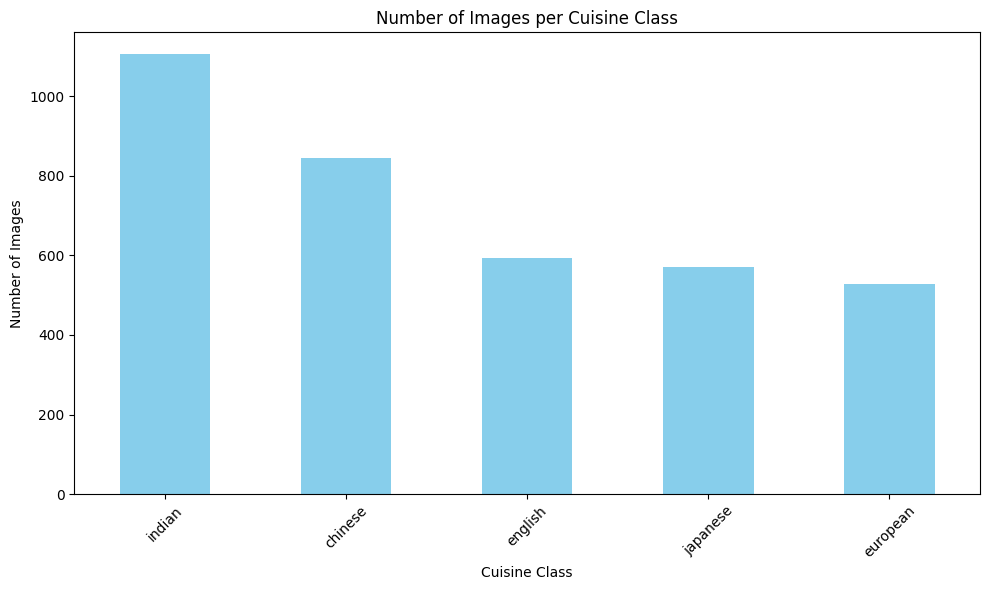

In [ ]:

#  the dataset size for each cuisine class
class_counts = combined_dataset['Cuisine'].value_counts()

#  the bar chart
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Images per Cuisine Class')
plt.xlabel('Cuisine Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# pre processing

In [ ]:
image_paths = combined_dataset['filename']
labels = combined_dataset['Cuisine']

In [ ]:
from skimage.transform import resize
from skimage import io, color, transform
#  images and preprocess
image_size = (200, 200)  #  image size
images = []
for path in image_paths:
    img = io.imread(path)
    img = color.rgb2gray(img)  #  to grayscale
    img = transform.resize(img, image_size)  #  the image to the desired size
    images.append(img)


images = np.array(images)

#  preprocessed images
np.save('/content/drive/MyDrive/Data_LARGE/Preprocessed_images.npy', images)


In [ ]:
#   features: mean and standard deviation of pixel intensities
features = []
for img in images:
    mean_intensity = np.mean(img)
    std_intensity = np.std(img)
    features.append([mean_intensity, std_intensity])

features = np.array(features)



# Save extracted features
np.save('/content/drive/MyDrive/Data_LARGE/extracted_features.npy', features)


# start
LOAD SAVED PREPROCESSED IMAGES AND EXTRACTED FEATURES

In [ ]:
#  preprocessed images
images = np.load('/content/drive/MyDrive/Data_LARGE/Preprocessed_images.npy')

#  extracted features
features = np.load('/content/drive/MyDrive/Data_LARGE/extracted_features.npy')



### Display some preprocessed images

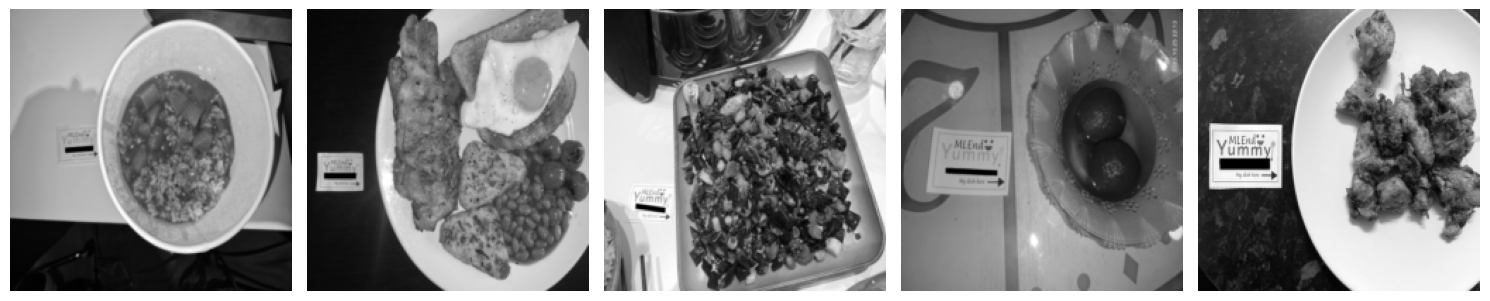

In [ ]:

num_images_to_display = 5
plt.figure(figsize=(15, 5))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(images[i], cmap='gray')  # Displaying in grayscale
    plt.axis('off')
plt.tight_layout()
plt.show()


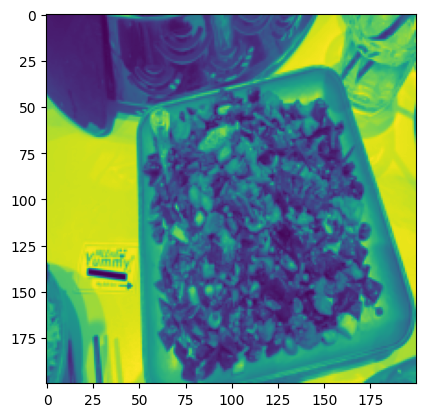

'chinese'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#  the first image using Matplotlib
plt.imshow(images[2])
plt.show()
labels[2]

# LABEL ENCODING TARGET CLASSES

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#  'filtered_labels' contains  labels

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

#  a DataFrame to display the labels and their encoded values
label_mapping = pd.DataFrame({'Label': filtered_labels, 'Encoded_Value': labels_encoded})

#  unique labels and their encoded values
unique_labels = label_mapping.drop_duplicates()
print(unique_labels)


      Label  Encoded_Value
0  japanese              4
1   english              1
2   chinese              0
3    indian              3
5  european              2


In [ ]:
len(images)

3068

# SPLITTING DATA INTO TRAIN AND TEST

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

#  a train-test split
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

#  the shapes of the resulting train and test sets
print(f"Train set - Images: {X_train.shape}, Labels: {len(y_train)}")
print(f"Test set - Images: {X_test.shape}, Labels: {len(y_test)}")


Train set - Images: (2454, 200, 200), Labels: 2454
Test set - Images: (614, 200, 200), Labels: 614


# TRAINING

In [ ]:

#  the number of classes
num_classes = len(set(labels_encoded))

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(num_classes, activation='softmax')
])

#  the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#   model for 50 epochs
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

#  the trained model
model.save('trained_model.h5')


Epoch 1/25
77/77 [==============================] - 20s 65ms/step - loss: 0.6341 - accuracy: 0.7824 - val_loss: 0.4928 - val_accuracy: 0.8127
Epoch 2/25
77/77 [==============================] - 3s 45ms/step - loss: 0.3376 - accuracy: 0.8912 - val_loss: 0.3753 - val_accuracy: 0.8697
Epoch 3/25
77/77 [==============================] - 3s 41ms/step - loss: 0.3021 - accuracy: 0.8965 - val_loss: 0.3987 - val_accuracy: 0.8795
Epoch 4/25
77/77 [==============================] - 3s 41ms/step - loss: 0.2453 - accuracy: 0.9185 - val_loss: 0.5241 - val_accuracy: 0.8583
Epoch 5/25
77/77 [==============================] - 3s 42ms/step - loss: 0.1953 - accuracy: 0.9315 - val_loss: 0.3812 - val_accuracy: 0.8730
Epoch 6/25
77/77 [==============================] - 3s 44ms/step - loss: 0.1602 - accuracy: 0.9478 - val_loss: 0.4151 - val_accuracy: 0.8632
Epoch 7/25
77/77 [==============================] - 3s 45ms/step - loss: 0.1368 - accuracy: 0.9580 - val_loss: 0.4006 - val_accuracy: 0.8779
Epoch 8/25
7

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


#CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

20/20 [==============================] - 0s 13ms/step


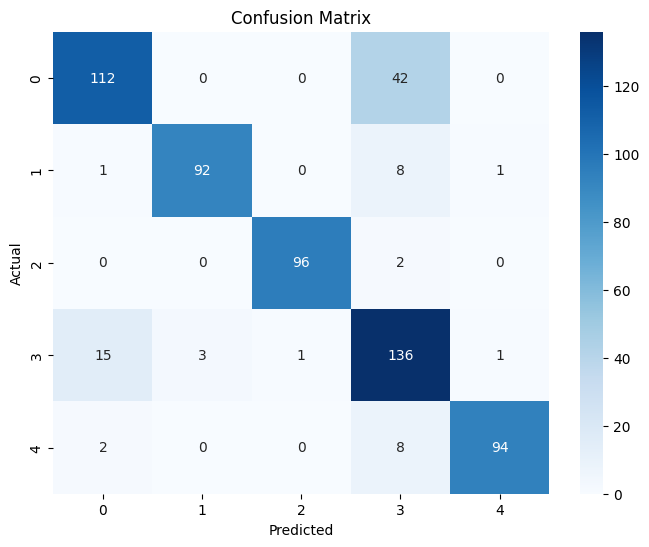

In [ ]:
y_pred_probs = model.predict(X_test)

y_pred_classes = np.argmax(y_pred_probs, axis=1)

#  confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

#  confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# GET PREDICTIONS

In [ ]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

#  the saved model
loaded_model = load_model('trained_model.h5')

#  to preprocess the uploaded image
def preprocess_image(file_path):
    img = Image.open(file_path)

    img = img.resize((200, 200))

    img = img.convert('L')  # 'L'  grayscale

    img = np.array(img) / 255.0

    img = img.reshape((1, 200, 200, 1))  # single grayscale image

    return img



In [ ]:
uploaded_image_path = '/content/drive/MyDrive/Data_LARGE/MLEnd/yummy/MLEndYD_images/000001.jpg'  # Replace with the actual file path

preprocessed_image = preprocess_image(uploaded_image_path)

predictions = loaded_model.predict(preprocessed_image)

predicted_label = np.argmax(predictions)

print(f"Predicted Label Index: {predicted_label}")

predicted_label_name = list(original_labels.keys())[list(original_labels.values()).index(predicted_label)]

print(f"Predicted Label: {predicted_label_name}")


1/1 [==============================] - 0s 20ms/step
Predicted Label Index: 4
Predicted Label: japanese
